# Class 9. Save and reload

In [1]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
%matplotlib inline
torch.manual_seed(1)

In [2]:
# Generate data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

In [3]:
# Save the neural network
def save():
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1),
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()
    
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # plot
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
    # save
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')  # save only parameters

In [7]:
# Restore the neural network
def restore_net():
    net2 = torch.load('net.pkl')
    prediction = net2(x)
    
    # plot
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [8]:
# Restore the network through parameters
def restore_params():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1),
    )
    
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    
    # plot
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

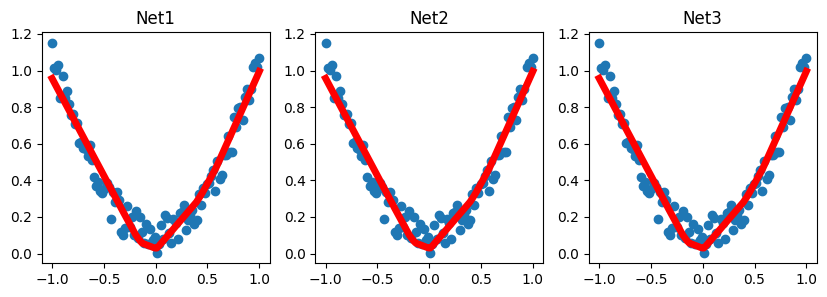

In [9]:
save()
restore_net()
restore_params()
plt.show()